## CONV

https://www.tensorflow.org/api_docs/python/tf/nn/conv2d

https://www.tensorflow.org/api_docs/python/tf/nn/bias_add

https://www.tensorflow.org/api_guides/python/nn#Convolution

## tf.nn.conv2d(input, filter, strides, padding)

这个函数对输入的4D`input`使用4D`filter`做2D卷积计算，步长由`strides`指定，填充方式由`padding`指定。输出一个4D的tensor表示结果。

* input: [batch, in_height, in_width, in_channels] 这个好理解，例如一个batch的图片。

* filter: [filter_height, filter_width, in_channels, out_channels] filter就是kernel。这里指定了kernel的高和宽，in_channels也就是必须和input的in_channels一样，也就是卷积核的深度。out_channels是卷积核的个数。

* strides: [1, stride, stride, 1] 也是4D的，格式由`data format`决定，默认也是NHWC。但是N和C必须等于1。中间两个就是高和宽的步长。

* padding: `SAME` 或者 `VALID`

* data format: NHWC or NCHW。默认是NHWC（Num_samples x Height x Width x Channels）

做卷积运算，卷积核的深度必须和输入的深度一致。从高和宽两个维度上，用卷积核覆盖输入，然后做卷积运算（包含所有的深度，最后求和）产生一个输出值。然后以stride为步长滑动再重复做卷积操作。

## Padding

填充一些值（比如0）在输入的空间边界（高和宽）外，从而在做卷积操作的时候，卷积核与输入的空间能够匹配。

常见的SAME操作，会在边界上填充，以保持输入和输出的空间大小不变。

### SAME

输出的大小由以下公式决定。原始大小除以步长以后向上取整。步长为1的时候，保持了空间的大小。步长为2，相当于长宽都变成一半，面积到1/4。

    out_height = ceil(float(in_height) / float(strides[1]))
    out_width  = ceil(float(in_width) / float(strides[2]))

填充的数量由这个公式决定。填充会分到四边，top/left在不整除的情况下会比bottom/right少1.

    pad_along_height = max((out_height - 1) * strides[1] +
                        filter_height - in_height, 0)
    pad_along_width = max((out_width - 1) * strides[2] +
                       filter_width - in_width, 0)
    pad_top = pad_along_height // 2
    pad_bottom = pad_along_height - pad_top
    pad_left = pad_along_width // 2
    pad_right = pad_along_width - pad_left
    
### Valid

输出大小的公式。步长为1时，相当于不填充（公式里减去了一个filter的大小）。步长不为1的时候，有可能不能整除，向上取整以后，就需要填充。填充值为0（相当于图片外面都是0）。

    out_height = ceil(float(in_height - filter_height + 1) / float(strides[1]))
    out_width  = ceil(float(in_width - filter_width + 1) / float(strides[2]))
    
例如输入为7x7,filter为3x3，步长为2。那么out = ceil((7-3+1) / 2) = 3。这种情况下就需要每边都填充1，下面那个cs231n的例子就是这种情况。

## tf.nn.bias_add(value, bias)


把bias加到value上。bias是1D tensor，大小要和value的最后一维相同。value可以是任何维度，bias的值会被broadcast到最后一维的所有点上。

In [1]:
from __future__ import print_function
import tensorflow as tf
import numpy as np

tf.InteractiveSession()

v = tf.constant(0, shape=[2, 2, 2])
b = tf.constant([1, 2])

o = tf.nn.bias_add(v, b)

print(v.eval())
print('+')
print(b.eval())
print('=')
print(o.eval())

/usr/local/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


[[[0 0]
  [0 0]]

 [[0 0]
  [0 0]]]
+
[1 2]
=
[[[1 2]
  [1 2]]

 [[1 2]
  [1 2]]]


## 数字实例

下面这个图来源于：http://cs231n.github.io/convolutional-networks/

![卷积操作实例](conv2d_example.png)

这是一个计算卷积操作的实例，下面用代码计算这个过程。输入是5x5，步长2，padding1。

In [2]:
x0 = [
    [2, 1, 2, 0, 0],
    [0, 2, 0, 2, 1],
    [1, 1, 2, 1, 2],
    [0, 1, 0, 0, 2],
    [1, 0, 1, 2, 2],
]
x1 = [
    [0, 0, 2, 2, 1],
    [0, 2, 1, 2, 2],
    [1, 1, 1, 1, 2],
    [2, 0, 2, 0, 0],
    [0, 0, 0, 0, 2],
]
x2 = [
    [1, 2, 2, 2, 0],
    [1, 1, 1, 1, 1],
    [2, 2, 1, 2, 1],
    [1, 0, 2, 0, 1],
    [1, 1, 1, 2, 0],
]
x = np.zeros((1, 5, 5, 3), dtype=np.float32)
x[:, :, :, 0] = x0
x[:, :, :, 1] = x1
x[:, :, :, 2] = x2

w00 = [
    [0,  -1, 0],
    [-1, -1, -1],
    [1,  -1, 0],
]
w01 = [
    [1, -1, 0],
    [0,  0, 0],
    [0,  0, 0],
]
w02 = [
    [1, -1,  0],
    [-1, 1, -1],
    [1,  0, 0],
]
W0 = np.zeros((3, 3, 3))
W0[:, :, 0] = w00
W0[:, :, 1] = w01
W0[:, :, 2] = w02

w10 = [
    [1,  1, -1],
    [1,  1,  0],
    [-1, 1,  1],
]
w11 = [
    [-1,  0, -1],
    [-1, -1,  1],
    [0,  -1,  1],
]
w12 = [
    [-1, 0, 0],
    [1,  0, 1],
    [1,  0, 1],
]
W1 = np.zeros((3, 3, 3))
W1[:, :, 0] = w10
W1[:, :, 1] = w11
W1[:, :, 2] = w12

W = np.zeros((3, 3, 3, 2), dtype=np.float32)
W[:, :, :, 0] = W0
W[:, :, :, 1] = W1

b = tf.constant([1, 0], dtype=np.float32)

conv = tf.nn.conv2d(x, W, strides=[1, 2, 2, 1], padding='SAME')
activation = tf.nn.bias_add(conv, b)
output = tf.nn.relu(activation)

print(activation.shape)
print('o[:,:,0]')
print(activation[0, :, :, 0].eval())
print()
print('o[:,:,1]')
print(activation[0, :, :, 1].eval())

print()
print('relu')
print(output[0, :, :, 0].eval())
print()
print(output[0, :, :, 1].eval())

(1, 3, 3, 2)
o[:,:,0]
[[-3. -1.  1.]
 [-2. -4. -6.]
 [-3. -8. -8.]]

o[:,:,1]
[[ 9. 10. -3.]
 [-2. -2.  4.]
 [ 1.  5.  6.]]

relu
[[0. 0. 1.]
 [0. 0. 0.]
 [0. 0. 0.]]

[[ 9. 10.  0.]
 [ 0.  0.  4.]
 [ 1.  5.  6.]]


## 图片实例

图片和kernel都来自于wiki：https://en.wikipedia.org/wiki/Kernel_(image_processing)


![原图](Vd-Orig.png)

\begin{bmatrix}
-1 &  -1 & -1 \\
-1 & \ \ 8 & -1 \\
-1 &  -1 & -1
\end{bmatrix}


(100, 100)


/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """


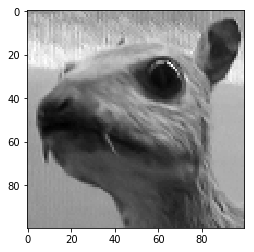

In [3]:
from scipy import misc
from matplotlib import pyplot as plt
%matplotlib inline

im = misc.imread('Vd-Orig.png', mode='L')
print(im.shape)
plt.imshow(im, cmap='gray')

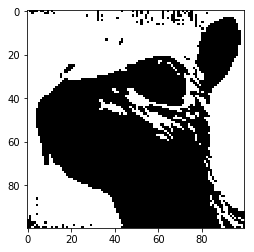

In [4]:
threshold = 127
im[im > threshold] = 255
im[im <= threshold] = 0
plt.imshow(im, cmap='gray')

Tensor("Cast:0", shape=(1, 100, 100, 1), dtype=float32)
Tensor("ExpandDims_3:0", shape=(3, 3, 1, 1), dtype=float32)
Tensor("Conv2D_1:0", shape=(1, 100, 100, 1), dtype=float32)
Tensor("Cast_1:0", shape=(100, 100), dtype=uint8)


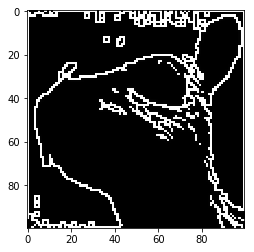

In [5]:
input = tf.expand_dims(im, 0)
input = tf.expand_dims(input, 3)
input = tf.cast(input, tf.float32)
print(input)

kernel = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1],
], dtype=np.float32)
filter = tf.expand_dims(kernel, 2)
filter = tf.expand_dims(filter, 3)
print(filter)

output = tf.nn.conv2d(input, filter, strides=[1, 1, 1, 1], padding='SAME')
print(output)

edge = tf.cast(tf.squeeze(output), tf.uint8)
print(edge)
plt.imshow(edge.eval(), cmap='gray')

## tf.nn.max_pool(value, ksize, strides, padding)

https://www.tensorflow.org/api_docs/python/tf/nn/max_pool

比如一个2x2的filter，stride=2，前一层空间信息减少75%

In [6]:
x = np.array([[1, 2], [3, 4]], dtype=np.float32)
x = tf.expand_dims(x, 0)
x = tf.expand_dims(x, 3)
y = tf.nn.max_pool(x, [1, 2, 2, 1], [1, 2, 2, 1], padding='SAME')
print('x:', x)
print('y:', y)
print(y.eval())

x: Tensor("ExpandDims_5:0", shape=(1, 2, 2, 1), dtype=float32)
y: Tensor("MaxPool:0", shape=(1, 1, 1, 1), dtype=float32)
[[[[4.]]]]


input: Tensor("ExpandDims_6:0", shape=(1, 100, 100, 3), dtype=float32)
output: Tensor("MaxPool_1:0", shape=(1, 50, 50, 3), dtype=float32)


/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


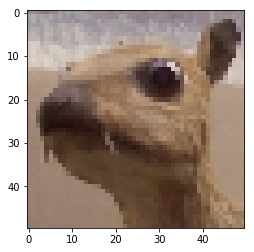

In [7]:
im = misc.imread('Vd-Orig.png')
input = tf.expand_dims(tf.cast(im, tf.float32), 0)
output = tf.nn.max_pool(input, [1, 2, 2, 1], [1, 2, 2, 1], padding='SAME')

print('input:', input)
print('output:', output)
im2 = tf.cast(tf.squeeze(output), tf.uint8)
plt.imshow(im2.eval())